In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [41]:
%matplotlib inline

In [42]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [43]:
ls

Project1.ipynb   allyears.csv.gz  names/           names.zip


In [44]:
ls names

NationalReadMe.pdf  yob1914.txt         yob1949.txt         yob1984.txt
yob1880.txt         yob1915.txt         yob1950.txt         yob1985.txt
yob1881.txt         yob1916.txt         yob1951.txt         yob1986.txt
yob1882.txt         yob1917.txt         yob1952.txt         yob1987.txt
yob1883.txt         yob1918.txt         yob1953.txt         yob1988.txt
yob1884.txt         yob1919.txt         yob1954.txt         yob1989.txt
yob1885.txt         yob1920.txt         yob1955.txt         yob1990.txt
yob1886.txt         yob1921.txt         yob1956.txt         yob1991.txt
yob1887.txt         yob1922.txt         yob1957.txt         yob1992.txt
yob1888.txt         yob1923.txt         yob1958.txt         yob1993.txt
yob1889.txt         yob1924.txt         yob1959.txt         yob1994.txt
yob1890.txt         yob1925.txt         yob1960.txt         yob1995.txt
yob1891.txt         yob1926.txt         yob1961.txt         yob1996.txt
yob1892.txt         yob1927.txt         yob1962.txt         yob1

In [45]:
names_2011 = open('names/yob2011.txt','r').readlines()[:10]

In [46]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number','year'])

In [47]:
names2011['year'] = 2011

In [48]:
names2011

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011
...,...,...,...,...
33903,Zylar,M,5,2011
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011


In [49]:
import pandas as pd

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through each year from 1880 to 2018
for year in range(1880, 2019):
    # Construct the file path for that year
    filepath = f'names/yob{year}.txt'
    
    # Load the CSV file into a DataFrame
    df = pd.read_csv(filepath, names=['name', 'sex', 'number'])
    
    # Add a 'year' column to the DataFrame, set to the current year
    df['year'] = year
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the individual DataFrames into a single DataFrame
allyears = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
# print(allyears)


In [50]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [51]:
allyears.to_csv('allyears.csv.gz', index=False)

In [52]:
# Load the compressed CSV file into a DataFrame
allyears = pd.read_csv('allyears.csv.gz')

# Set multi-index using 'sex', 'name', and 'year'
allyears_indexed = allyears.set_index(['sex', 'name', 'year'])

# Sort the index
allyears_indexed.sort_index(inplace=True)


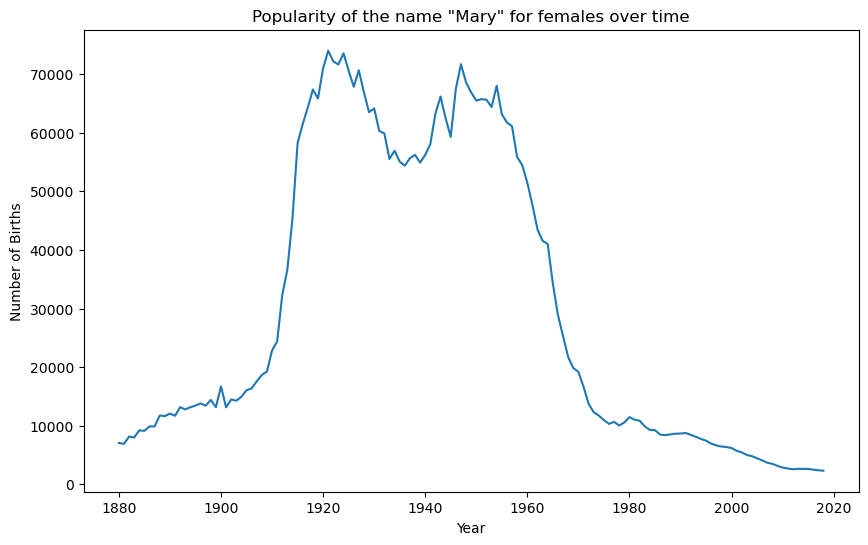

In [53]:
# Extract the data for "Mary" and "F"
data_mary_f = allyears_indexed.loc[('F', 'Mary')]

# Reset the index for plotting 
data_mary_f.reset_index(inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(data_mary_f['year'], data_mary_f['number'])

# Add title and labels
plt.title('Popularity of the name "Mary" for females over time')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Show the plot
plt.show()

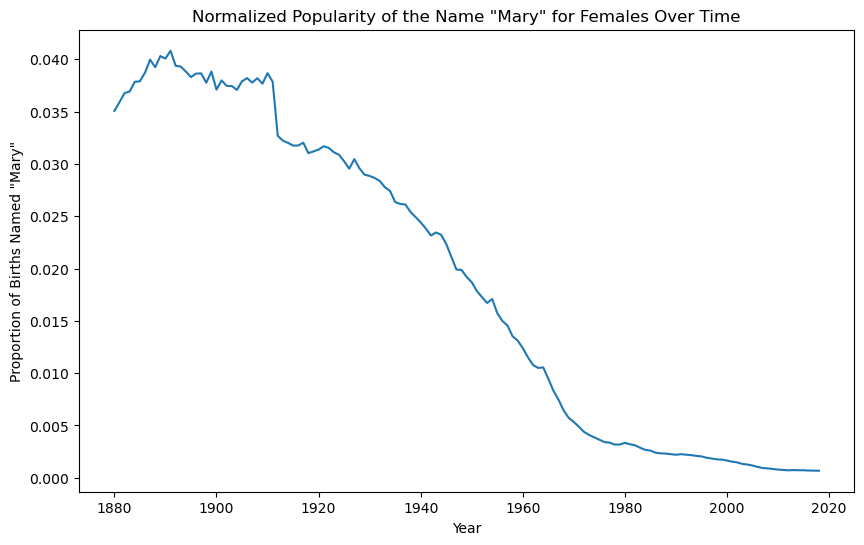

In [54]:
# Calculate the total number of births for each year, for all names and both sexes
total_births_by_year = allyears_indexed.groupby('year')['number'].sum()

# Extract the data for "Mary" and "F"
data_mary_f = allyears_indexed.loc[('F', 'Mary')]

# Normalize the occurrences of "Mary" by dividing by the total number of births each year
# Note: We use `.loc` here to make sure we align the data by the matching 'year' index
data_mary_f['normalized'] = data_mary_f['number'] / total_births_by_year.loc[data_mary_f.index]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(data_mary_f.index, data_mary_f['normalized'])

# Add title and labels
plt.title('Normalized Popularity of the Name "Mary" for Females Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Births Named "Mary"')

# Show the plot
plt.show()

In [55]:
def plotname(sex, name):
    data = allyears_indexed.loc[(sex, name)]

    plt.plot(data.index, data['number'], label=name)

    plt.title(f'Popularity of the Name "{name}" for {sex} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Births')

In [56]:
def comparenames(sex, names):
    plt.figure(figsize=(15, 4))

    for name in names:
        plotname(sex, name)

    plt.legend()
    plt.title(f'Comparison of Name Popularity for {sex}')
    plt.xlabel('Year')
    plt.ylabel('Number of Births')
    plt.show()

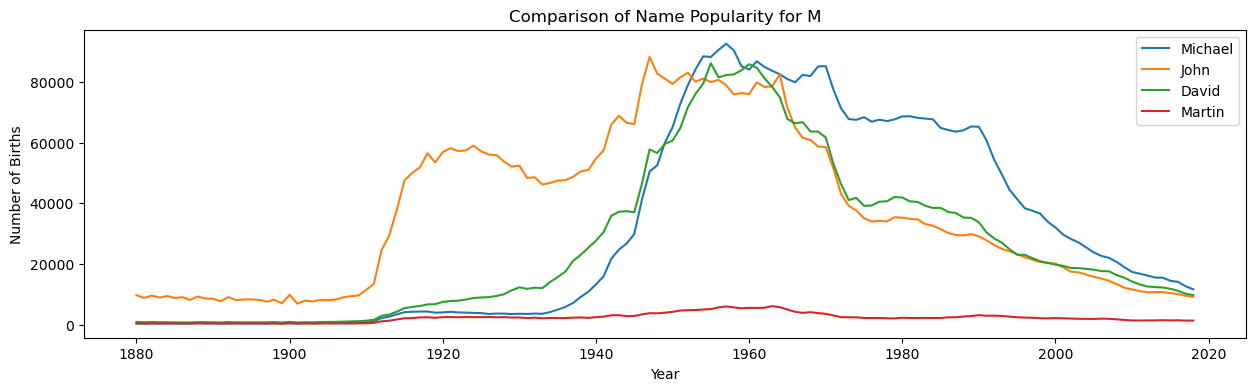

In [57]:
comparenames('M', ['Michael', 'John', 'David', 'Martin'])

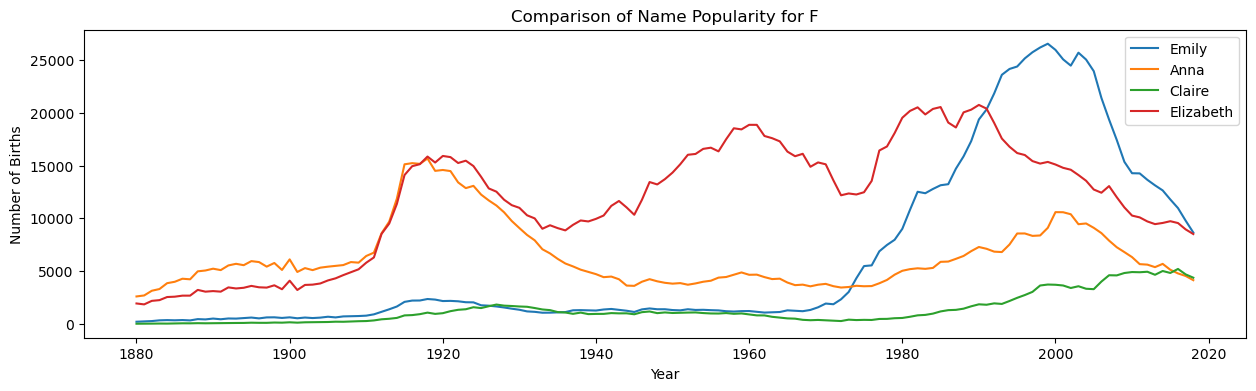

In [58]:
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])